In [1]:
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import numpy as np

In [2]:
PATH = 'Titanic-Dataset.csv'
dataset = pd.read_csv(PATH)
dataset = dataset.drop(columns=['Embarked', 'Cabin', 'Ticket', 'PassengerId', 'Name', 'SibSp', 'Fare', 'Age'])
# dataset = dataset.dropna(subset=['Age'])

In [3]:
for column in dataset:
    match dataset[column][0]:
        case str():
            dataset[column] = pd.factorize(dataset[column])[0]
        case float():
            dataset[column] = (dataset[column] - dataset[column].min())/(dataset[column].max() - dataset[column].min())
dataset

,Survived,Pclass,Sex,Parch
0,0,3,0,0
1,1,1,1,0
2,1,3,1,0
3,1,1,1,0
4,0,3,0,0
...,...,...,...,...
886,0,2,0,0
887,1,1,1,0
888,0,3,1,2
889,1,1,0,0


<Axes: >

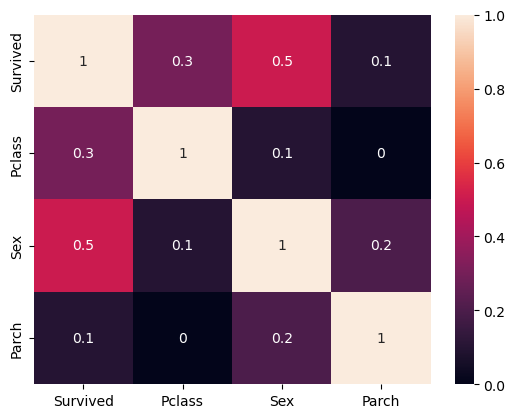

In [4]:
sns.heatmap(
    round(
        abs(dataset.corr()),
        1,
    ),
    annot=True,
)

In [13]:
train_input, test_input, train_output, test_output = train_test_split(
    dataset.drop('Survived', axis=1),
    dataset["Survived"],
    test_size=0.2
)

In [14]:
model = GaussianNB()
model.fit(train_input, train_output)
predictions = model.predict(test_input)
accuracy = metrics.accuracy_score(predictions, test_output)
print(f"Точность модели на тестовом участке = {accuracy}")

Точность модели на тестовом участке = 0.8156424581005587
